# Evalute Image Similarity
**Develop functions for calculating MSE and PSNR.**

**A. Load the Cameraman image and calculate the MSE and PSNR with the image itself without change. Randomly replace 10 pixels of the image with 255 values and compare the modified image with the original image using the MSE and PSNR methods. Shift all the pixels of the original image one pixel upwards and compare with the original image through the methods mentioned.
In each step, submit array of the image of these functions and provide values of MSE and PSNR values.**

**Download the MNIST dataset and read it in the input. This dataset contains images of handwritten numbers from one to ten. Read the images that are exclusively related to the numbers 3 and 7 in the train path. Calculate an average of all images related to the number 3. Also repeat this action for the number 7. In the valid path, read images of the numbers 3 and 7 in about 10 images, and for each MSE and PSNR image, compare it with the two averages 3 and 7. Can this method be used to recognize images of handwritten numbers? Report the challenges of this method. The report should be presented using the image and statistics related to the mentioned steps.**

### Part A

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output
+ `skimage` for changing and applyting filters to images
+ `pandas` for storing result data


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import pandas as pd

In the following code snippets, we will implement MSE(Mean Squared Error) and PSNR(Peak Signal-to-Noise Ratio) formula:

<a href="https://www.codecogs.com/eqnedit.php?latex=MSE&space;=&space;\frac{\sum_{m=0}^{M-1}&space;\sum_{n=0}^{N-1}&space;[f(m,&space;n)&space;-&space;\hat{f}(m,n)]^2}{MN}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?MSE&space;=&space;\frac{\sum_{m=0}^{M-1}&space;\sum_{n=0}^{N-1}&space;[f(m,&space;n)&space;-&space;\hat{f}(m,n)]^2}{MN}" title="MSE = \frac{\sum_{m=0}^{M-1} \sum_{n=0}^{N-1} [f(m, n) - \hat{f}(m,n)]^2}{MN}" /></a>

<a href="https://www.codecogs.com/eqnedit.php?latex=PSNR&space;=&space;10\times&space;log(\frac{255^2}{MSE})" target="_blank"><img src="https://latex.codecogs.com/gif.latex?PSNR&space;=&space;10\times&space;log(\frac{255^2}{MSE})" title="PSNR = 10\times log(\frac{255^2}{MSE})" /></a>

In [2]:
def calculate_MSE(image_1, image_2):
    """
    image_1, image_2: images which it should calculate their MSE
    return MSE value
    """
    # Checking for equality of the images' sizes
    if sorted(image_1.shape) != sorted(image_2.shape):
        # raising error for images with different sizes
        raise ValueError("Arguements must have same shape.")
    # Calculating MSE value based on its formula
    size = image_1.shape
    MSE_array = (image_1 - image_2) ** 2
    return MSE_array.sum() / (size[0] * size[1])

In [3]:
def calculate_PSNR(image_1, image_2):
    """
    image_1, image_2: images which it should calculate their PSNR
    return PSNR value
    """
    MSE = calculate_MSE(image_1, image_2)
    # Check for MSE value to be zero
    if MSE == 0:
        return float("inf")
    # Calculating PSNR value based on its formula 
    PSNR = 10 * np.log(255 ** 2 / MSE)
    return PSNR

Then we read Cameraman image and calculate its MSE and PSNR with itself.

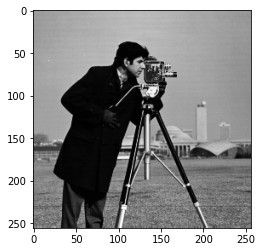

In [4]:
# Reading Cameraman image in grayscale mode
cameraman = cv2.imread("../../images/cameraman.tif", cv2.IMREAD_GRAYSCALE)

# Showing the image
plt.imshow(cameraman, cmap="gray")
plt.show()

In [5]:
# Printing MSE and PSNR values
print("MSE =", calculate_MSE(cameraman, cameraman))
print("PSNR =", calculate_PSNR(cameraman, cameraman))

MSE = 0.0
PSNR = inf


Next, we will define a function which change `n` pixels to `new_value`.

In [6]:
def change_random_pixels(img, n=10, new_value=255):
    """
    img: the image which pixels will be changed
    n: number of changing pixels
    new_value: new value of random pixels from 0 to 255
    """
    # Creating a copy of image
    image = img.copy()
    # Choosing n random rows from image
    index_x = np.random.choice(image.shape[0], n, replace=True)
    # Choosing n random columns from image
    index_y = np.random.choice(image.shape[1], n, replace=True)
    # Changing random sample values to new_value
    for i in range(n):
        image[index_x[i]][index_y[i]] = int(new_value)
    return image

In the next few lines, we will change 10 pixels of Cameraman to 255, and calculate MSE and PSNR with original versoin

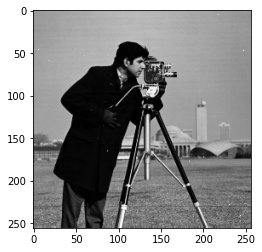

In [7]:
# Changing 10 pixels of Cameraman image to 255 
cameraman_noised = change_random_pixels(cameraman, n=10)

# Showing the corrupted image
plt.imshow(cameraman_noised, cmap="gray")
plt.show()

In [8]:
# Printing MSE and PSNR values
print("MSE=", calculate_MSE(cameraman, cameraman_noised))
print("PSNR=", calculate_PSNR(cameraman, cameraman_noised))

MSE= 0.016937255859375
PSNR= 151.607666849696


We will shift each row of Cameraman one unit upside and calculate MSE and PSNR with original version.

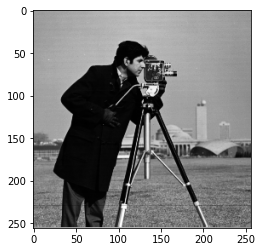

In [9]:
# Shift each row of Cameraman image 1 unit upside 
cameraman_shifted = np.roll(cameraman, -1, axis=0)

# Showing the corrupted image
plt.imshow(cameraman_shifted, cmap="gray")
plt.show()

In [10]:
# Printing MSE and PSNR values
print("MSE=", calculate_MSE(cameraman, cameraman_shifted))
print("PSNR=", calculate_PSNR(cameraman, cameraman_shifted))

MSE= 34.19256591796875
PSNR= 75.50518840696381


### Part B
Following code snippet will help us to read and see [MNIST](https://en.wikipedia.org/wiki/MNIST_database) data.

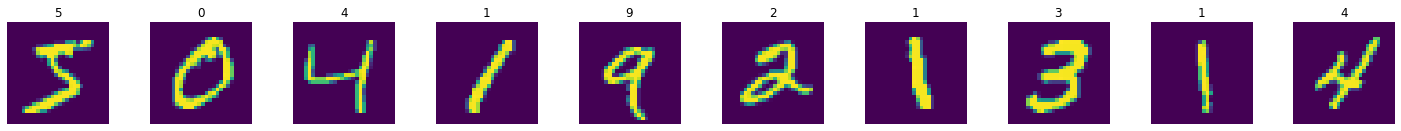

In [11]:
# Defining function for load MNIST
def loadMNIST(prefix, folder):
    intType = np.dtype("int32").newbyteorder(">")
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile(folder + "/" + prefix + "-images-idx3-ubyte", dtype="ubyte")
    magicBytes, nImages, width, height = np.frombuffer(
        data[:nMetaDataBytes].tobytes(), intType
    )
    data = data[nMetaDataBytes:].astype(dtype="int").reshape([nImages, width, height])

    labels = np.fromfile(folder + "/" + prefix + "-labels-idx1-ubyte", dtype="ubyte")[
        2 * intType.itemsize :
    ]

    return data, labels

# Loading data using function above
trainingImages, trainingLabels = loadMNIST("train", "../../mnist/")
testImages, testLabels = loadMNIST("t10k", "../../mnist/")

# Showing 10 images as an example
f, subplt = plt.subplots(1, 10, figsize=(20, 20))
f.tight_layout()

for i in range(10):
    subplt[i].imshow(trainingImages[i])
    subplt[i].axis("off")
    subplt[i].set_title(trainingLabels[i])

Then we will seprate training data based on their labels.

In [12]:
train_data = {}
for i in range(10):
    # Seperating training using np.where() function for applying condition on their labels
    train_data[i] = np.where(trainingLabels == i)[0]

In the next code snippet, we will calculate average model for each number and plot them.

In [13]:
avg_model = {}

for i in range(10):
    # Preallocating array
    sum_images = np.zeros((28, 28), dtype="int")
    for j in train_data[i]:
        # Summing each value with label i
        sum_images += trainingImages[j]
    # Devising the sum by number of images labeled i 
    avg_model[i] = sum_images / len(train_data[i])


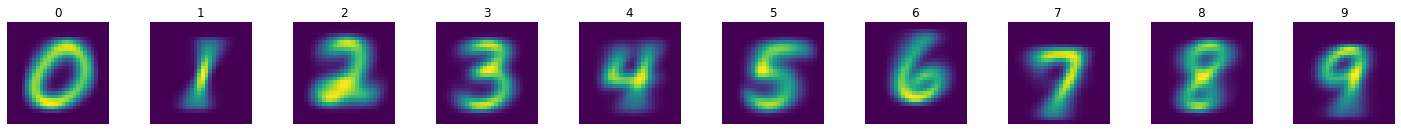

In [14]:
# Showing average models
f, subplt = plt.subplots(1, 10, figsize=(20, 20))
f.tight_layout()

for i in range(10):
    subplt[i].imshow(avg_model[i])
    subplt[i].axis("off")
    subplt[i].set_title(i)


Next code snippet consists of one function which get `image` and calculate MSE of it and each average model. Then it will return digit and minimum MSE.

In [15]:
def guess_MSE(image):
    """
    image: the image which should be labeled based on average models
    return tuple consists of suggested label and MSE value
    """
    MSE_values = np.zeros((10,))
    # Calculating MSE for image and each digit
    for i in range(10):
        MSE_values[i] = calculate_MSE(image, avg_model[i])
    return (np.argmin(MSE_values), np.min(MSE_values))


Next code snippet consists of one function which get `image` and calculate PSNR of it and each average model. Then it will return digit and maximum PSNR.

In [16]:
def guess_PSNR(image):
    """
    image: the image which should be labeled based on average models
    return tuple consists of suggested label and PSNR value
    """
    PSNR_values = np.zeros((10,))
    # Calculating PNSR for image and each digit
    for i in range(10):
        PSNR_values[i] = calculate_PSNR(image, avg_model[i])
    return (np.argmax(PSNR_values), np.max(PSNR_values))


Next we will choose a sample from test data and guess its number using MSE.

In [75]:
# Choosing a sample from test data
sample_size = 10000
random_sample = np.random.choice(testImages.shape[0], sample_size, replace=False)

# Creating table for data
data = np.zeros((sample_size, 5))
for j in range(sample_size):
    # Choosing random image
    i = random_sample[j]
    img = testImages[i]
    # Getting response based on average models
    res = guess_MSE(img)
    # Defining index of test data
    data[j][0] = i
    # Defining actual label
    data[j][1] = testLabels[i]
    # Defining guessed label
    data[j][2] = res[0]
    # Defining min MSE value
    data[j][3] = res[1]
    # Defining validity
    data[j][4] = testLabels[i] == res[0]

# Converting array to pandas DataFrame
MSE_data = pd.DataFrame(
    data=data[0:, 1:],
    index=random_sample,
    columns=("Test Label", "Guessed Label", "MSE Value", "Valid"),
)

# Showing summary of data 
total = MSE_data["Valid"].sum()
print(
    "Valid guesses: {}%, {} out of {}".format(
        (total * 100 / sample_size), total, sample_size
    )
)
# Showing data frame
display(MSE_data)

Valid guesses: 82.03%, 8203.0 out of 10000


,Test Label,Guessed Label,MSE Value,Valid
26,7.0,7.0,2919.140985,1.0
2360,6.0,6.0,2912.625658,1.0
9395,1.0,1.0,1607.461006,1.0
5524,1.0,1.0,1409.256115,1.0
5231,8.0,8.0,3439.453568,1.0
...,...,...,...,...
7314,6.0,6.0,3070.059120,1.0
6169,4.0,4.0,4705.414512,1.0
7115,2.0,2.0,4033.807216,1.0
5867,5.0,3.0,4448.103714,0.0


Next we will choose a sample from test data and guess its number using PSNR.

In [76]:
# Creating table for data
data = np.zeros((sample_size, 5))
for j in range(sample_size):
    # Choosing random image
    i = random_sample[j]
    img = testImages[i]
    # Getting response based on average models
    res = guess_PSNR(img)
    # Defining index of test data
    data[j][0] = i
    # Defining actual label
    data[j][1] = testLabels[i]
    # Defining guessed label
    data[j][2] = res[0]
    # Defining max PSNR value
    data[j][3] = res[1]
    # Defining validity
    data[j][4] = testLabels[i] == res[0]

# Converting array to pandas DataFrame
PSNR_data = pd.DataFrame(
    data=data[0:, 1:],
    index=random_sample,
    columns=("Test Label", "Guessed Label", "PSNR Value", "Valid"),
)

# Showing summary of data 
total = PSNR_data["Valid"].sum()
print(
    "Valid guesses: {}%, {} out of {}".format(
        (total * 100 / sample_size), total, sample_size
    )
)
# Showing data frame
display(PSNR_data)

Valid guesses: 82.03%, 8203.0 out of 10000


,Test Label,Guessed Label,PSNR Value,Valid
26,7.0,7.0,31.034824,1.0
2360,6.0,6.0,31.057168,1.0
9395,1.0,1.0,37.001159,1.0
5524,1.0,1.0,38.317098,1.0
5231,8.0,8.0,29.394592,1.0
...,...,...,...,...
7314,6.0,6.0,30.530750,1.0
6169,4.0,4.0,26.260579,1.0
7115,2.0,2.0,27.800612,1.0
5867,5.0,3.0,26.822939,0.0


Next, we want to look closer to each labeles and validities

<AxesSubplot:title={'center':'PSNR Guesses'}, xlabel='Guessed Label'>

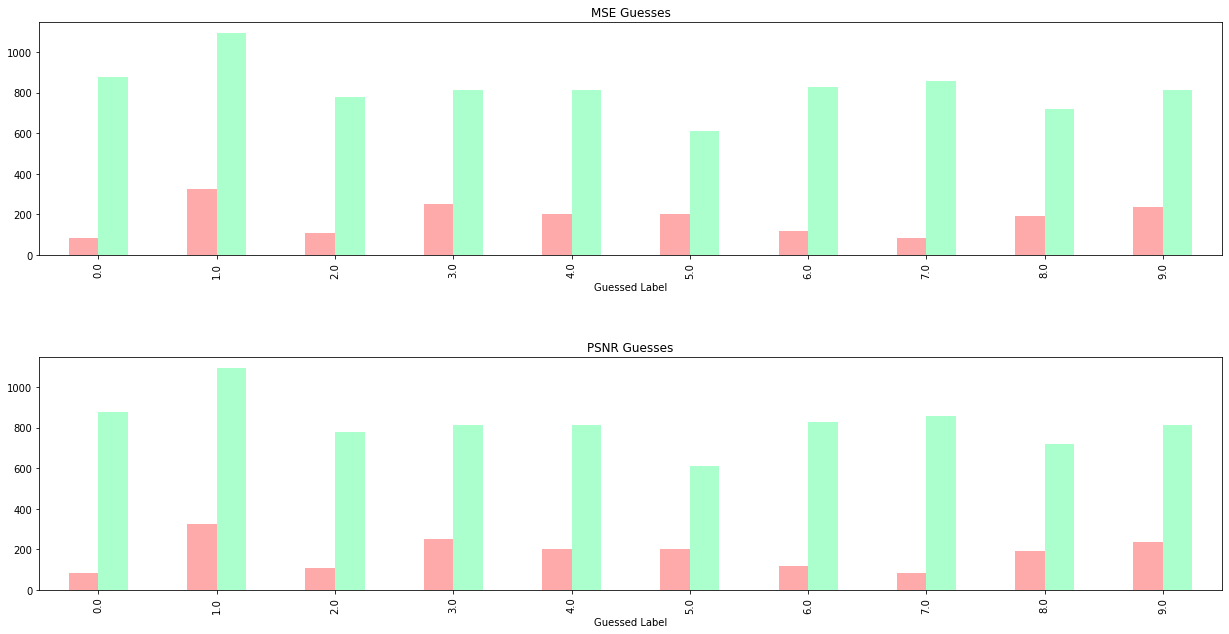

In [69]:
# Counting number of each label for MSE
df_MSE = (
    MSE_data.groupby(["Guessed Label", "Valid"]).agg("count").reset_index().iloc[:, :-1]
)
df_MSE.columns = ["Guessed Label", "Valid", "Count"]

df_MSE = pd.pivot_table(
    df_MSE,
    values="Count",
    index="Guessed Label",
    columns="Valid",
)

# Counting number of each label for MSE
df_PSNR = (
    PSNR_data.groupby(["Guessed Label", "Valid"])
    .agg("count")
    .reset_index()
    .iloc[:, :-1]
)
df_PSNR.columns = ["Guessed Label", "Valid", "Count"]

df_PSNR = pd.pivot_table(
    df_PSNR,
    values="Count",
    index="Guessed Label",
    columns="Valid",
)

# Showing plot based on number of right and wrong guesses for each label
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad=2.0)
df_MSE.plot(
    kind="bar",
    color=["#faa", "#afc"],
    ax=axes[0],
    figsize=(20, 15),
    legend=False,
    title="MSE Guesses",
)
df_PSNR.plot(
    kind="bar",
    color=["#faa", "#afc"],
    ax=axes[1],
    figsize=(20, 10),
    legend=False,
    title="PSNR Guesses",
)


Two distributes of guesses look very similar, so we should find the number of similar and different guesses.

<AxesSubplot:>

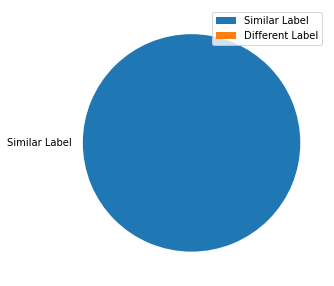

In [68]:
# Counting similar guesses
df = MSE_data[["Valid"]] == PSNR_data[["Valid"]]
df["index1"] = df.index
no_similar = df.groupby(df.Valid).count().iloc[0, 0]
no_different = len(MSE_data) - no_similar
# Showing pie plot for similarity
df = pd.DataFrame(
    {"similarity": [no_similar, no_different]},
    index=["Similar Label", "Different Label"],
)
df.plot.pie(y="similarity", figsize=(5, 5), ylabel="")


As we can see all of MSE and PSNR guesses are exactly the same which does make sense. So overall these two parameters for measuring similarity of two images are roughly the same perfomance, and their only difference is the scale of numbers!